### K均值聚类
步骤：
1. 随机选取K个中心点$u_1$,$u_2$,$u_3$,...,$u_k$（一般直接从数据源中选取）
2. 遍历所有点，找到离每个点最近的中心点$c^{(i)}(i=1,2,3,...,k)$
3. 重新计算中心点,$u_k=average(重新分配到k中心点的所有点)$
4. 重复2-3

### 作业1

In [53]:
import numpy as np
import sys
from matplotlib import pyplot as plt
from scipy import io as sio


def runKmeans(X, initial_centroids, K, max_iter = 1, plot_progeress=False):
    """
    X: array, shape=[rows,cols], 待聚类点，必须是二维
    initial_centroids: array, shape=[K, cols]，初始K个中心点
    return: tuple(centroids,idx)
        centroids, shape=[K, cols], 经过训练后的K个中心点
    """
    # 随机初始化K个聚类中心，这里根据吴恩达的数据直接指定
    if plot_progeress:
        plt.scatter(X[:,0], X[:, 1])
    centroids = initial_centroids
    idx = None
    for _ in range(max_iter):
        idx = findClosestCentroids(X, centroids)
        previous_centroids = centroids
        centroids = computeCentroids(X, idx, K)
        # 绘制KMeans聚类中心点移动过程
        if plot_progeress:
            plt.scatter(previous_centroids[:, 0], previous_centroids[:, 1], marker='x', color='r')
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
    if plot_progeress:
        plt.show()
    return centroids,np.array(idx)


def findClosestCentroids(X, centroids):
    idx = []
    for _, x in enumerate(X):
        min_distance = sys.maxsize
        min_id = -1
        for j, o in enumerate(centroids):
            distance = np.dot((x - o), (x - o))
            if distance < min_distance:
                min_distance = distance
                min_id = j
        assert(min_id != -1)
        idx.append(min_id)
    return idx


def computeCentroids(X, idx, K=3):
    """
    X: array, shape=[rows,cols], 待聚类点，必须是二维
    idx: array, shape=[rows,] or [rows,1], 离X[i]最近的点centroids[idx[i]]
    """
    centroids = np.zeros((K, X.shape[1]))
    for _id, x in zip(idx, X):
        centroids[_id] += x
    for i in range(K):
        centroids[i] /= np.sum((np.array(idx) == i).astype(np.int32))
    return centroids

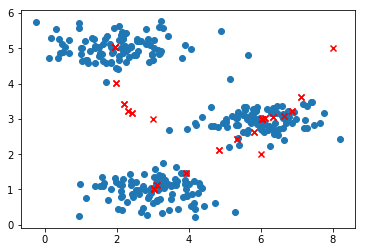

In [17]:
X = sio.loadmat('ex7data2.mat')['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
K = 3
centroids,idx=runKmeans(X, initial_centroids, K, 
                        max_iter=10, plot_progeress=True)

### 作业2：使用KMeans进行图像压缩
1. `bird_small.png`包含了上万种颜色，通过聚类，用16种颜色来表示

In [18]:
from numpy import random
def initialize_random_centroids(X, K):
    return random.permutation(X[:K])

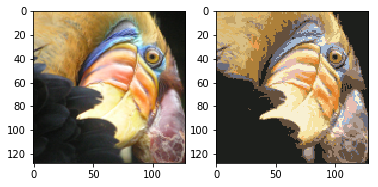

In [52]:
from matplotlib import image
fig,ax = plt.subplots(1,2)
ax1,ax2 = ax

img = image.imread('./bird_small.png')
ax1.imshow(img)
imgsize = img.shape
img = img.reshape((imgsize[0]*imgsize[1],3))

# KMeans Config
K = 16
max_iter = 10
centroids=initialize_random_centroids(img, K)
centroids,idx=runKmeans(img, centroids, K, max_iter=max_iter, plot_progeress=False)

img_recover = centroids[idx,:]
img_recover = img_recover.reshape((imgsize[0],imgsize[1],3))
ax2.imshow(img_recover)
